<a href="https://colab.research.google.com/github/chltmd132600-max/cv/blob/main/Copy_of_2025_Analysis_PersonalSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common Patterms

To identify common patterns and expressions in a collection of resumes, you can use various natural language processing (NLP) techniques and Python libraries. Here are some methods and recommendations:
1)Tokenization and Text Preprocessing;
2)Frequency Analysis;
3)TF-IDF (Term Frequency-Inverse Document Frequency);
4)Sentiment Analysis;
5)NER

### Step 1: Data Collection

#####For data collection, you can gather text data from various sources, such as text files, websites, or databases, and store it in a variable or file.

## Let's load multiple files in a folder by using Google Drive.

📌 목적 (Goal):

Google Colab에서 사용할 수 있도록 공유받은 폴더를 내 드라이브에 연결합니다.
To use the shared folder in Google Colab, you must first add a shortcut to your own “My Drive.”

🧭 따라하기 (Step-by-Step Instructions):
🔹 ① 공유 문서함 열기

Go to “Shared with me” folder

Google Drive 왼쪽 메뉴에서 “공유 문서함”(또는 “Shared with me”) 클릭

🔹 ② 폴더에서 점 세 개 클릭

Click the 3-dot menu of the shared folder

원하는 폴더(예: 2025_PersStatementsCorpus) 오른쪽의 점 세 개 메뉴(⁝) 클릭

🔹 ③ “정리” 클릭

Click “Organize”

메뉴 중에서 “정리” 또는 영어로 “Organize” 선택

🔹 ④ “바로가기 추가” 클릭

Click “Add shortcut”

“바로가기 추가(Add shortcut)” 버튼 클릭

🔹 ⑤ “모든 위치” → “내 드라이브” 선택

Choose “All Locations” → “My Drive”

위치 선택 팝업이 뜨면 “모든 위치(All locations)” 클릭

그런 다음 “내 드라이브(My Drive)” 선택

🔹 ⑥ “추가” 버튼 클릭

Click “Add”

마지막으로 “추가(Add shortcut)” 버튼 클릭하면 완료!


- Now you can mount your Google Drive to access your files. Run the code below:

In [6]:
from google.colab import drive

#1) Mount your Google Drive (구글 드라이브 마운트)
drive.mount('/content/drive') # 좌측 하단 팝업에서 계정 선택 후 '허용'

# Reading text files in a folder
import os

#2) Define the path to the folder containing your text files (폴더 경로 설정)
folder_path = '/content/drive/MyDrive/2025_PersStatementsCorpus'

# Initialize a list to store the text content of each file
text_contents = []

# List all files in the folder
files = os.listdir(folder_path)

# Loop through the files and read their contents
for file_name in files:
    # Check if the file is a text file (you can customize the file extension)
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        try:
            with open(file_path, 'r', encoding='utf-8') as file:  # Use 'cp1252' for ANSI encoding
                text_content = file.read()
                text_contents.append(text_content)
        except UnicodeDecodeError:
            print(f"Error reading file: {file_name}. Encoding issue. Skipping...")

# Preprocess the text data
# You can use the same preprocessing steps you applied earlier

# Combine the text contents into a single document
text_data = '\n'.join(text_contents)

# 3) Quick corpus summary (코퍼스 요약 점검)
import re

def word_count(s):
    return len(re.findall(r"\b\w+\b", s))

lengths = [len(t) for t in text_contents]
words   = [word_count(t) for t in text_contents]

print("Total files:", len(text_contents))
print("Total characters:", sum(lengths))
print("Total words:", sum(words))
print("Average words/doc:", round(sum(words)/max(1, len(words)), 1))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total files: 92
Total characters: 324204
Total words: 51814
Average words/doc: 563.2


### Step 2: Data Preprocessing

For data preprocessing, you can clean, tokenize, remove stopwords, and perform stemming/lemmatization.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt_tab')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Clean and preprocess text
text_data = text_data.lower()  # Convert to lowercase
tokens = word_tokenize(text_data)  # Tokenization
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

# Remove numbers, and additional punctuation
# Define a list of additional punctuation marks to remove
import string  # Import the string module for additional punctuation removal
additional_punctuation = list(string.punctuation) + [".", ","]
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha() and word not in additional_punctuation]

# Apply stemming
#stemmer = PorterStemmer()
#stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#1. Frequency Analysis of Words:

-Use Python's collections.Counter to count the frequency of words or phrases in personal statements.
-Identify the most frequent terms, which are likely common expressions.

In [8]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common expressions
common_expressions = word_counts.most_common(20)  # Adjust the number as needed
print(common_expressions)

[('also', 207), ('english', 201), ('students', 185), ('skills', 164), ('experience', 156), ('language', 148), ('work', 128), ('business', 127), ('learning', 107), ('world', 93), ('school', 91), ('university', 91), ('studies', 88), ('teaching', 88), ('course', 87), ('study', 85), ('would', 85), ('literature', 83), ('people', 82), ('believe', 82)]


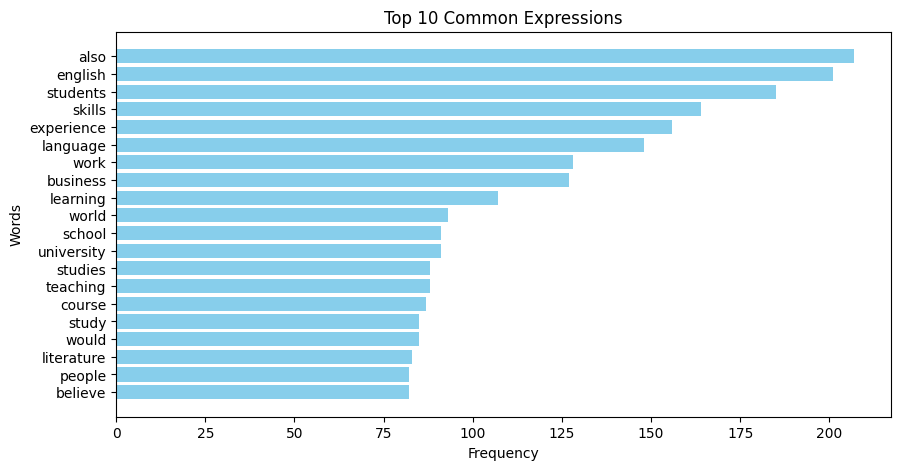

In [9]:
import matplotlib.pyplot as plt

# Extract words and their frequencies from common_expressions
words, frequencies = zip(*common_expressions)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Common Expressions')
plt.gca().invert_yaxis()  # Invert the y-axis for readability
plt.show()

#2. Bigram and Trigram Analysis:

-Analyzing bigrams (n=2) and trigrams (n=3) helps identify common word sequences and phrases.

In [20]:
def generate_ngrams(text, n):
    tokens = text.split()
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i + n])
        ngrams.append(ngram)
    return ngrams

n = 3  # Change n to desired value (e.g., 2 for bigrams, 3 for trigrams)
ngrams = generate_ngrams(text_data, n)

from collections import Counter

# Count n-gram frequencies
ngram_counts = Counter(ngrams)

# List the most common n-grams
most_common_ngrams = ngram_counts.most_common(10)  # Adjust the number as needed
for ngram, count in most_common_ngrams:
    print(f'{ngram}: {count} times')

as well as: 43 times
i want to: 33 times
this course or: 30 times
course or subject?: 30 times
allowed me to: 30 times
i aim to: 29 times
the opportunity to: 28 times
the importance of: 24 times
i believe that: 24 times
my ability to: 23 times


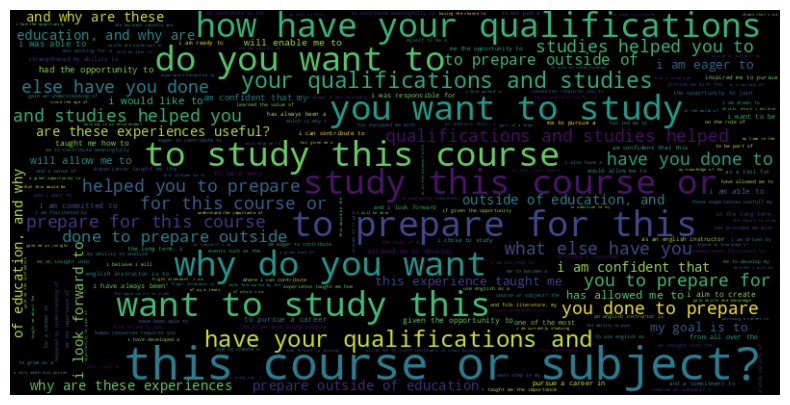

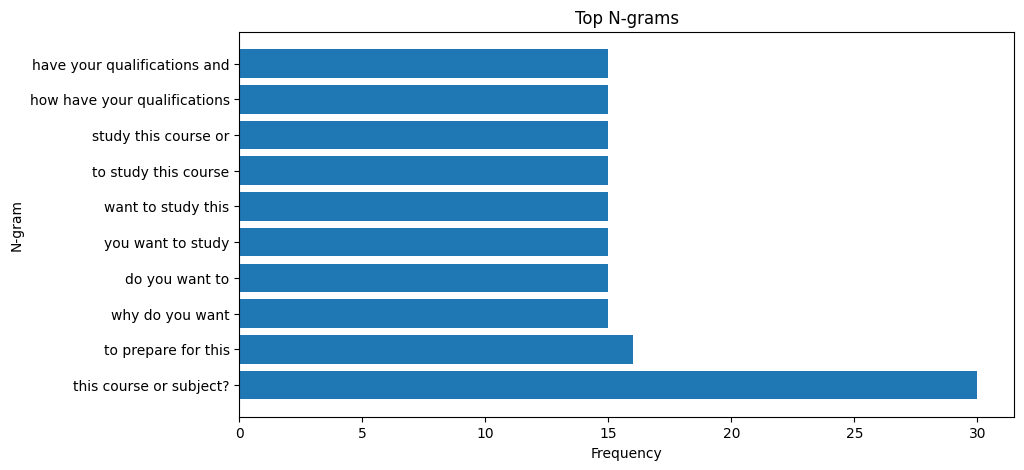

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ngram_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot a bar chart
ngram_labels, ngram_values = zip(*most_common_ngrams)
plt.figure(figsize=(10, 5))
plt.barh(ngram_labels, ngram_values)
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top N-grams')
plt.show()

#3. TF-IDF (Term Frequency-Inverse Document Frequency):

- Calculate the TF-IDF scores of terms to identify terms that are important in the context of personal statements.
- Terms with higher TF-IDF scores are likely to be common expressions or keywords.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine your filtered tokens back into a text format (each document on a separate line)
filtered_text = ' '.join(filtered_tokens)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform your filtered text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform([filtered_text])

# Get the TF-IDF scores and feature names
tfidf_scores = tfidf_matrix.toarray()[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store feature names and their TF-IDF scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Print the top N words with the highest TF-IDF scores
top_tfidf_words = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top TF-IDF Words:")
for word, score in top_tfidf_words:
    print(f"{word}: {score:.4f}")


Top TF-IDF Words:
english: 0.2509
students: 0.2309
skills: 0.2047
experience: 0.1947
language: 0.1847
work: 0.1598
business: 0.1585
learning: 0.1336
world: 0.1161
school: 0.1136


#4. Sentiment Analysis:

- You can use sentiment analysis to determine the overall sentiment (positive, negative, neutral) of the personal statements.
- You can use various NLP libraries such as NLTK, TextBlob, or VADER for sentiment analysis. Below is an example using TextBlob:

###Sentiment analysis in TextBlob
-typically provides two main metrics for understanding the sentiment of a piece of text:

1.   **Polarity**: Polarity measures the sentiment as positive, negative, or neutral. It quantifies the degree of positive or negative sentiment in the text. The polarity score is typically in the range of -1 to 1, where:

*   A score greater than 0 indicates positive sentiment.
*   A score less than 0 indicates negative sentiment.
*   A score of 0 indicates neutral sentiment.



2.  **Subjectivity**: Subjectivity measures how subjective or objective the text is. It quantifies the degree of personal opinion, emotion, or subjectiveness in the text. The subjectivity score is typically in the range of 0 to 1, where:

*   A score closer to 0 indicates a more objective or factual text.
*   A score closer to 1 indicates a more subjective or opinionated text.


In [13]:
from textblob import TextBlob

# Create a TextBlob object
text_blob = TextBlob("This is a coding class")

# Analyze sentiment
sentiment = text_blob.sentiment

# Determine overall sentiment
if sentiment.polarity > 0:
    overall_sentiment = "Positive"
elif sentiment.polarity < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

print(f"Overall Sentiment: {overall_sentiment}")
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Sentiment Subjectivity: {sentiment.subjectivity}")


Overall Sentiment: Neutral
Sentiment Polarity: 0.0
Sentiment Subjectivity: 0.0


In [14]:
!pip install textblob
from textblob import TextBlob

# Convert filtered_tokens list back to a single string
all_text = ' '.join(filtered_tokens)

# Create a TextBlob object
text_blob = TextBlob(all_text)

# Analyze sentiment
sentiment = text_blob.sentiment



# Print sentiment polarity and subjectivity
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Sentiment Subjectivity: {sentiment.subjectivity}")

Sentiment Polarity: 0.146470918022403
Sentiment Subjectivity: 0.41623320891641635


In [15]:
# Let's add "determine the polarity and subjectivity"

# Determine overall sentiment
if sentiment.polarity > 0:
    overall_sentiment = "Positive"
elif sentiment.polarity < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

print(f"Overall Sentiment: {overall_sentiment}")

# Determine overall subjectivity
if sentiment.subjectivity >= 0.5:
    overall_subjectivity = "Subjective"
else:
    overall_subjectivity = "Objective"

print(f"Overall Subjectivity: {overall_subjectivity}")

Overall Sentiment: Positive
Overall Subjectivity: Objective


#5. Named Entity Recognition (NER):

Use NER to identify common entities, such as company names, job titles, or skills, in the personal statements.

In [21]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
!pip install spacy
import spacy

# Load the language model
nlp = spacy.load('en_core_web_sm')

# Convert filtered_tokens list back to a single string
all_text = ' '.join(filtered_tokens)

# Process the text with spaCy
doc = nlp(all_text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print named entities and their labels
for entity, label in entities:
    print(f"Entity: {entity}, Label: {label}")


Entity: daily, Label: DATE
Entity: addis ababa, Label: GPE
Entity: ethiopia, Label: GPE
Entity: firstly, Label: ORDINAL
Entity: february, Label: DATE
Entity: days, Label: DATE
Entity: mary university ucl king college, Label: ORG
Entity: five second, Label: TIME
Entity: evening, Label: TIME
Entity: one, Label: CARDINAL
Entity: two weeks, Label: DATE
Entity: two days week, Label: DATE
Entity: belgian, Label: NORP
Entity: europe, Label: LOC
Entity: european, Label: NORP
Entity: past three years, Label: DATE
Entity: daily, Label: DATE
Entity: six years old, Label: DATE
Entity: year, Label: DATE
Entity: english, Label: LANGUAGE
Entity: first, Label: ORDINAL
Entity: two, Label: CARDINAL
Entity: thousands, Label: CARDINAL
Entity: july, Label: DATE
Entity: first, Label: ORDINAL
Entity: english, Label: LANGUAGE
Entity: english, Label: NORP
Entity: five, Label: CARDINAL
Entity: summer months, Label: DATE
Entity: three years, Label: DATE
Entity: today, Label: DATE
Entity: two, Label: CARDINAL
Ent

### How to interpret the output:
-The output is a list of named entities (such as organizations, persons, dates, locations, etc.) identified in your text data by spaCy. Each line in the output represents a named entity along with its associated label. Here's how you can interpret the result:


1.   Entity: This is the text of the named entity found in your text data.

2.   Label: This is the label or category assigned to the named entity by spaCy. Some common labels include:
*   ORG: Organization (e.g., Young Enterprise Team, Human Resources)
*   PERSON: Person's name (e.g., Claire, Head Boy)
*   DATE: Date (e.g., nearly three years, the evening)
*   NORP: Nationality, religious, or political group (e.g., Lunch, Chinese)
*   GPE: Geopolitical entity, such as countries, cities, or states (e.g., Prague, Thailand)
*   CARDINAL: Cardinal number (e.g., one, four, 60)
*   WORK_OF_ART: Titles of books, songs, etc. (e.g., Principles of Management and Leadership, MBA)
*   LANGUAGE: Language (e.g., English)
*   PRODUCT: Product name (e.g., GCSE Maths, Coca Cola)
*   LOC: Location (e.g., Hospital)
*   ORDINAL: Ordinal number (e.g., first, sixth)
*   QUANTITY: Quantity (e.g., forty two kilometers)





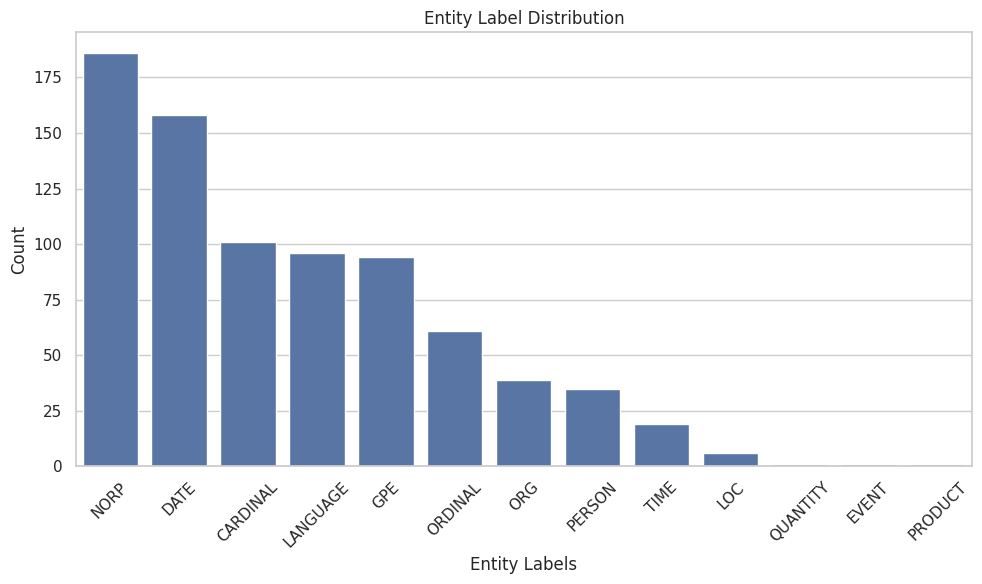

Entity Label Counts:
Entity Labels
NORP        186
DATE        158
CARDINAL    101
LANGUAGE     96
GPE          94
ORDINAL      61
ORG          39
PERSON       35
TIME         19
LOC           6
QUANTITY      1
EVENT         1
PRODUCT       1
Name: count, dtype: int64


In [23]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(all_text)  # Assuming 'all_text' contains your combined text

# Create a list to store entity labels
entity_labels = []
for ent in doc.ents:
    entity_labels.append(ent.label_)

# Create a pandas DataFrame for analysis
data = {'Entity Labels': entity_labels}
df = pd.DataFrame(data)

# Count the occurrences of each entity label
label_counts = df['Entity Labels'].value_counts()

# Create a bar chart to visualize the entity label distribution
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Entity Labels')
plt.ylabel('Count')
plt.title('Entity Label Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

# Display the counts of each entity label
print("Entity Label Counts:")
print(label_counts)


#Compare with your own draft
- Save your draft in .txt format
- Open a new notebook and follow the stpes here starting with "Load your draft" as below.

In [24]:
from google.colab import files

# Step 1: Upload files
uploaded = files.upload()  # 사용자가 파일을 선택해서 업로드

# Step 2: Concatenate all text
text_data = ""
for filename in uploaded.keys():
    with open(filename, "r", encoding="utf-8") as f:
        text_data += f.read() + "\n"

# Step 3: Calculate statistics
total_characters = len(text_data)
total_words = len(text_data.split())

# Step 4: Print results
print("✅ All files combined successfully!")
print("Total characters:", total_characters)
print("Total words:", total_words)


Saving personal statement01.txt to personal statement01.txt
✅ All files combined successfully!
Total characters: 2847
Total words: 418


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt_tab')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Clean and preprocess text
text_data = text_data.lower()  # Convert to lowercase
tokens = word_tokenize(text_data)  # Tokenization
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

# Remove numbers, and additional punctuation
# Define a list of additional punctuation marks to remove
import string  # Import the string module for additional punctuation removal
additional_punctuation = list(string.punctuation) + [".", ","]
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha() and word not in additional_punctuation]

# Apply stemming
#stemmer = PorterStemmer()
#stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common expressions
common_expressions = word_counts.most_common(20)  # Adjust the number as needed
print(common_expressions)

[('skills', 3), ('service', 3), ('korea', 3), ('cultural', 3), ('travelers', 3), ('communication', 2), ('experience', 2), ('international', 2), ('visitors', 2), ('support', 2), ('foreign', 2), ('guest', 2), ('customer', 2), ('explaining', 2), ('others', 2), ('situations', 2), ('practice', 2), ('requires', 2), ('program', 2), ('youth', 2)]


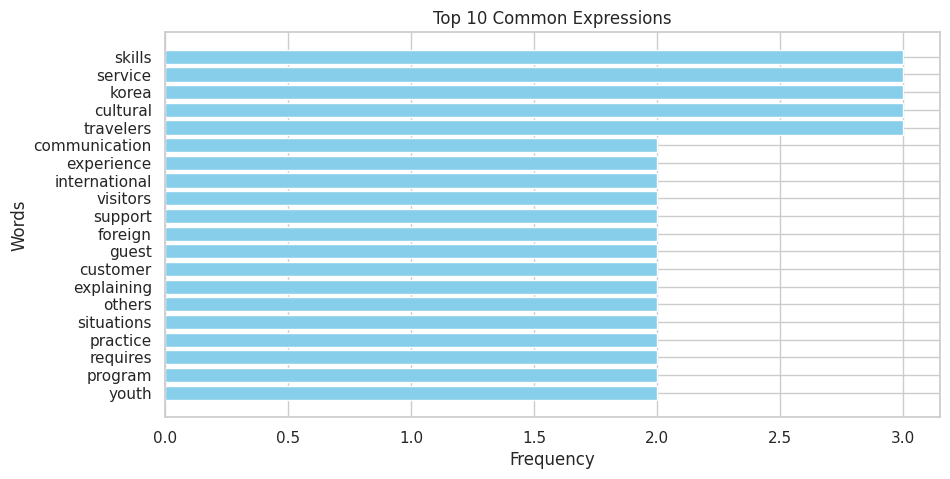

In [27]:
import matplotlib.pyplot as plt

# Extract words and their frequencies from common_expressions
words, frequencies = zip(*common_expressions)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Common Expressions')
plt.gca().invert_yaxis()  # Invert the y-axis for readability
plt.show()

In [32]:
def generate_ngrams(text, n):
    tokens = text.split()
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i + n])
        ngrams.append(ngram)
    return ngrams

n = 4  # Change n to desired value (e.g., 2 for bigrams, 3 for trigrams)
ngrams = generate_ngrams(text_data, n)

from collections import Counter

# Count n-gram frequencies
ngram_counts = Counter(ngrams)

# List the most common n-grams
most_common_ngrams = ngram_counts.most_common(10)  # Adjust the number as needed
for ngram, count in most_common_ngrams:
    print(f'{ngram}: {count} times')

i have developed strong: 1 times
have developed strong communication: 1 times
developed strong communication and: 1 times
strong communication and problem-solving: 1 times
communication and problem-solving skills: 1 times
and problem-solving skills through: 1 times
problem-solving skills through years: 1 times
skills through years of: 1 times
through years of experience: 1 times
years of experience assisting: 1 times


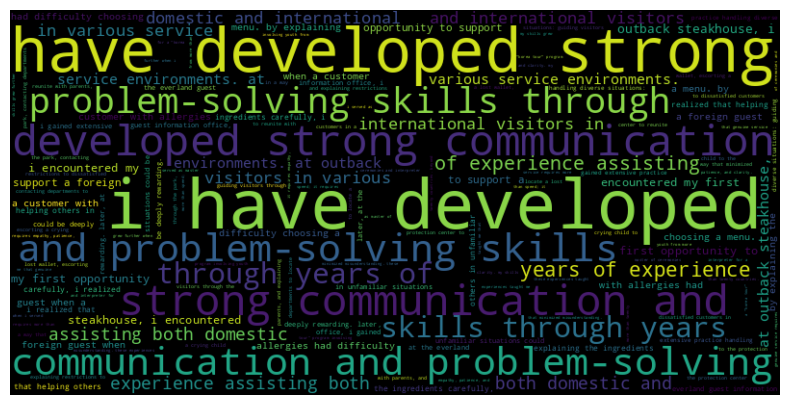

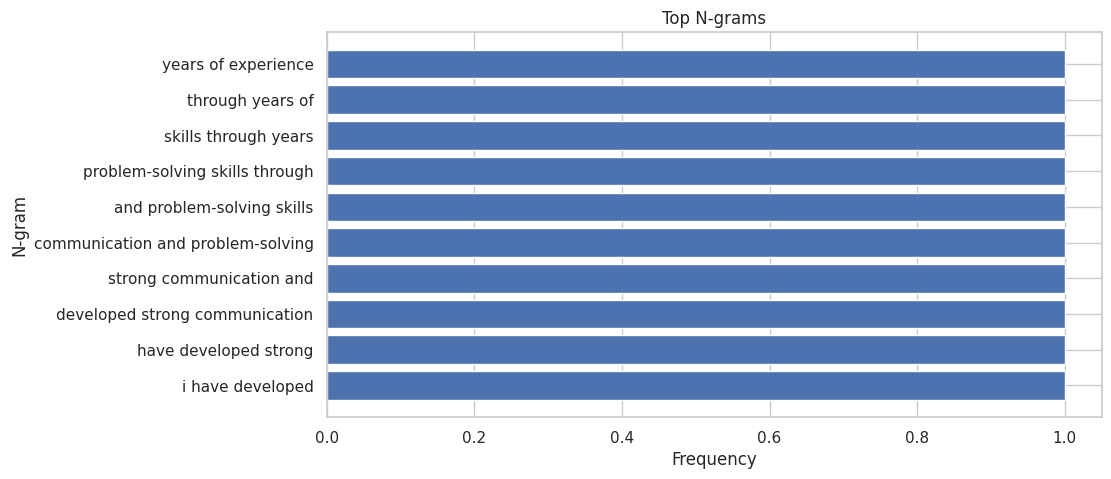

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ngram_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot a bar chart
ngram_labels, ngram_values = zip(*most_common_ngrams)
plt.figure(figsize=(10, 5))
plt.barh(ngram_labels, ngram_values)
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top N-grams')
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine your filtered tokens back into a text format (each document on a separate line)
filtered_text = ' '.join(filtered_tokens)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform your filtered text data to calculate TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform([filtered_text])

# Get the TF-IDF scores and feature names
tfidf_scores = tfidf_matrix.toarray()[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a dictionary to store feature names and their TF-IDF scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Print the top N words with the highest TF-IDF scores
top_tfidf_words = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top TF-IDF Words:")
for word, score in top_tfidf_words:
    print(f"{word}: {score:.4f}")

Top TF-IDF Words:
cultural: 0.1726
korea: 0.1726
service: 0.1726
skills: 0.1726
travelers: 0.1726
ability: 0.1151
accuracy: 0.1151
backgrounds: 0.1151
communication: 0.1151
customer: 0.1151


In [34]:
from textblob import TextBlob

# Create a TextBlob object
text_blob = TextBlob("This is a coding class")

# Analyze sentiment
sentiment = text_blob.sentiment

# Determine overall sentiment
if sentiment.polarity > 0:
    overall_sentiment = "Positive"
elif sentiment.polarity < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

print(f"Overall Sentiment: {overall_sentiment}")
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Sentiment Subjectivity: {sentiment.subjectivity}")

Overall Sentiment: Neutral
Sentiment Polarity: 0.0
Sentiment Subjectivity: 0.0


In [35]:
!pip install textblob
from textblob import TextBlob

# Convert filtered_tokens list back to a single string
all_text = ' '.join(filtered_tokens)

# Create a TextBlob object
text_blob = TextBlob(all_text)

# Analyze sentiment
sentiment = text_blob.sentiment



# Print sentiment polarity and subjectivity
print(f"Sentiment Polarity: {sentiment.polarity}")

Sentiment Polarity: 0.10086844050258685


In [36]:
# Let's add "determine the polarity and subjectivity"

# Determine overall sentiment
if sentiment.polarity > 0:
    overall_sentiment = "Positive"
elif sentiment.polarity < 0:
    overall_sentiment = "Negative"
else:
    overall_sentiment = "Neutral"

print(f"Overall Sentiment: {overall_sentiment}")

# Determine overall subjectivity
if sentiment.subjectivity >= 0.5:
    overall_subjectivity = "Subjective"
else:
    overall_subjectivity = "Objective"

print(f"Overall Subjectivity: {overall_subjectivity}")

Overall Sentiment: Positive
Overall Subjectivity: Objective
